# Control Aprendizaje No Supervisado

1. **Describa en qué consiste el agrupamiento jerárquico, incluyendo ventajas, desventajas y ejemplo de aplicación** 

**Respuesta 1**
* El algoritmo consiste en agrupar los datos con sus vecinos más cercanos, lo primero que hace es agrupar datos, que luego se unen a otros grupos de datos, gráficamente se ve como un arbol, donde en las hojas se encuentran los datos que están más cerca, y hacia arriba se encuentran los grupos de datos y sus uniones. 
* La principal ventaja de este algoritmo, es que es facilmente observable el posible número de grupos (valor de K). Por el contrario, la desventaja de este algoritmo es que los datos se asignan a grupos a los que puede no pertenecer pero una vez ahí, no pueden ser parte de otro, resultado que podría no ser el ideal.
* Un posible uso de este algoritmo es el utilizado en marketing para poder identificar usuarios con hábitos de compra similares. Otro que se la da a este algoritmo en el área de analisis de señales, es la eliminación de ruido.

2. **Describa el modelo de mezcla de normales (GMM), incluyendo ventajas, desventajas y ejemplo de aplicación.**

**Respuesta 2**
* Este funcionamiento de este algoritmo consiste en encontrar en encontrar puntos de máxima verosimilitud en el espacio de soluciones y a partir de ahí agrupa a los datos más cercanos, generando gaussianas.
* De esto ultimo se desprende la primera ventaja, no todos los datos tienen la misma probabilidad de pertenecer a un grupo, los datos más lejanos a los centros tienen menor posibilidad de pertecer a ese grupo. Por otra parte, el problema de este algoritmo es que es muy sensible a los parametros de entrada y podría ocasionar que sea inestable, y siendo un método local, la función de optimización podría covnerger en un máximo local. Por otra parte se debe tener en cuenta el ajuste del modelo, asignarle un valor K demasiado alto podría causar una partición excesiva, esto sería inutel para el posterior estudio.
* Un tipo de uso que se le da este algoritmo es en el procesamiento de imagenes, cuando se busca identificar objetos en una imágen, como autos, o acciones, como caminar, saltar, etc.

**Parte práctica:** Considere los datos adjuntos provenientes de un estudio de caracterización de  estado físico de un grupo de atletas. Los datos contienen los siguientes 10 parámetros para 100 atletas:

    - rcc: recuento de glóbulos rojos por litro
    - wcc: recuento de glóbulos blancos por litro
    - hc: hematocrito (porcentaje)
    - hg: concentración de hemaglobina, en gr por 100 ml
    - ferr: ferritinas de plasma, ng
    - bmi: Índice de masa corporal, kg
    - pcBfat: porcentaje de grasa corporal
    - lbm: masa corporal magra, kg
    - ht: Altura en cm
    - wt: peso kg 

Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. 
    1. Justifique la elección del método y desarrolle los agrupamientos correspondientes
    2. Indique y justifique los valores de los parámetros utilizados. 
    3. Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales.
    4. Interprete sus resultados.


In [1]:
library(cluster)
library(ggplot2)
datos <-read.csv("datos.csv",row.names=1,dec=".",header=TRUE,sep=",")
summary(datos)

Warning message:
"package 'cluster' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.2"


      rcc             wcc               hc              hg       
 Min.   :3.800   Min.   : 3.300   Min.   :35.90   Min.   :11.60  
 1st Qu.:4.168   1st Qu.: 5.800   1st Qu.:38.27   1st Qu.:12.70  
 Median :4.385   Median : 6.700   Median :40.60   Median :13.50  
 Mean   :4.404   Mean   : 6.994   Mean   :40.48   Mean   :13.56  
 3rd Qu.:4.537   3rd Qu.: 7.950   3rd Qu.:42.30   3rd Qu.:14.30  
 Max.   :5.330   Max.   :13.300   Max.   :47.10   Max.   :15.90  
      ferr             bmi            pcBfat           lbm       
 Min.   : 12.00   Min.   :16.75   Min.   : 8.07   Min.   :34.36  
 1st Qu.: 36.00   1st Qu.:20.27   1st Qu.:13.24   1st Qu.:51.93  
 Median : 50.00   Median :21.82   Median :17.94   Median :54.92  
 Mean   : 56.96   Mean   :21.99   Mean   :17.85   Mean   :54.89  
 3rd Qu.: 71.50   3rd Qu.:23.39   3rd Qu.:21.36   3rd Qu.:59.40  
 Max.   :182.00   Max.   :31.93   Max.   :35.52   Max.   :72.98  
       ht              wt       
 Min.   :148.9   Min.   :37.80  
 1st Qu.:1

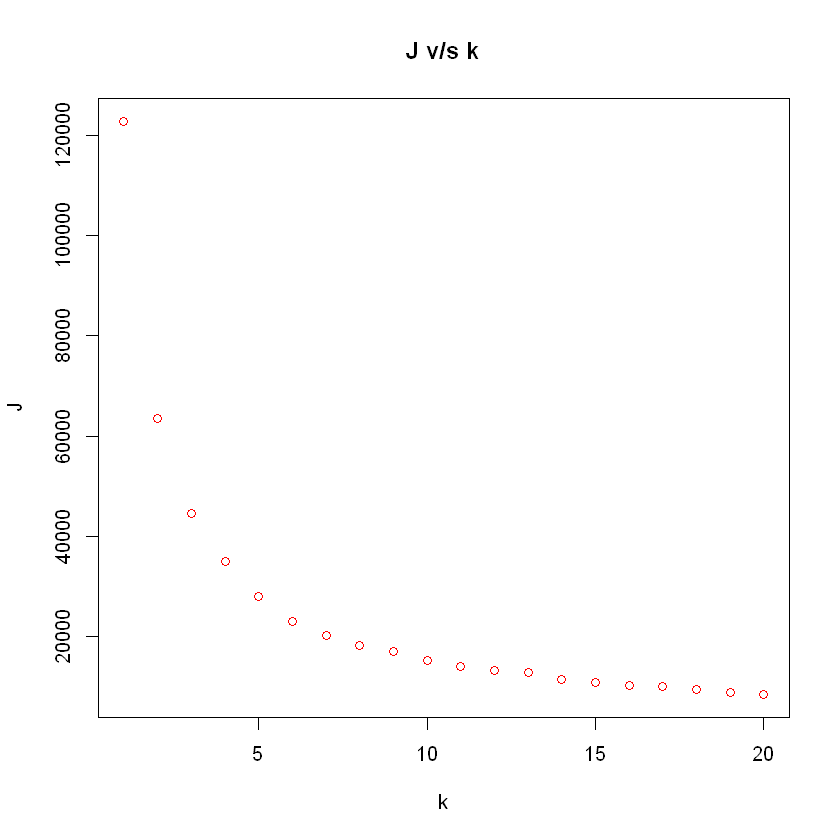

In [2]:
J<-rep(0,20)
fin_iter<-20

for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}

plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k",col=2) 

Warning message:
"package 'kohonen' was built under R version 3.6.3"


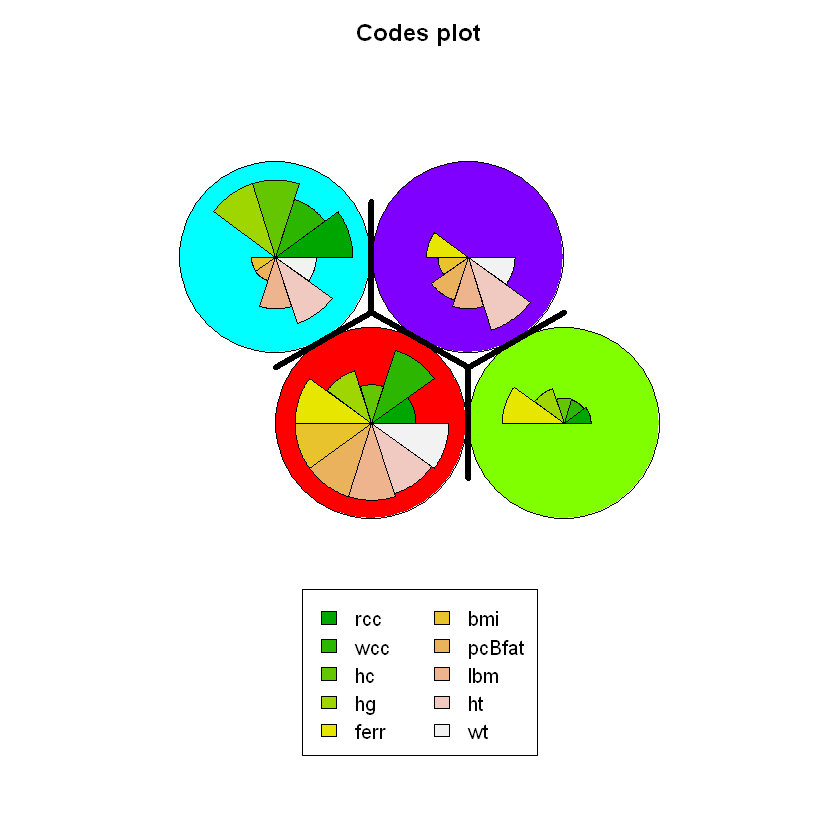

In [3]:
library(kohonen)
set.seed(0)

sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))

mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-4
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)

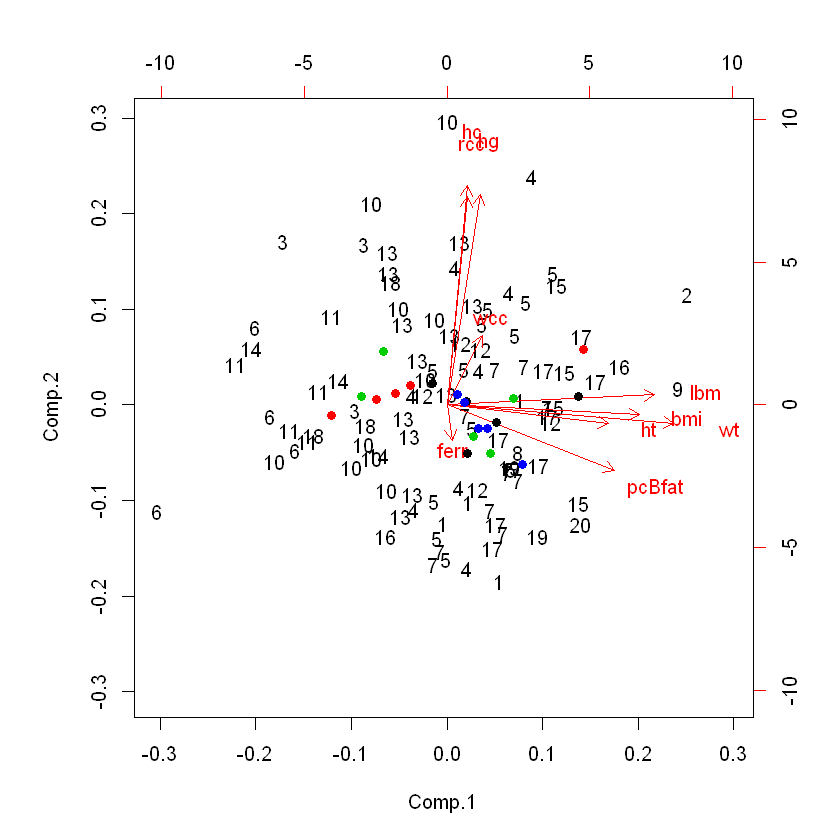

In [4]:
k0=4

res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)

biplot(res,xlabs=cl$cluster)
points(res2[,1:10],col=1:k0,pch=19)

Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. 
    1. Justifique la elección del método y desarrolle los agrupamientos correspondientes
    2. Indique y justifique los valores de los parámetros utilizados. 
    3. Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales.
    4. Interprete sus resultados.
    
**Respuestas**
1. La decisión de utilizar el método kohonen fue por un descarte, hice pruebas con los otros algoritmos gráficando los puntos y agrupandolos, pero las divisiones de los grupos es poco clara, esto es algo que se puede observar en la gráfica de los valores de K, donde se observa que la respuesta del grupo de datos es relativamente lineal al cambio de K.
2. Para decidir el valor de K me basé en la gráfica de los valores de K, pero debido a que la respuesta es tan lineal, decidí usar el criterio del "codo", o sea, tomé el valor más cercano al origen del gráfico, el cual es 4 (a simple vista).
3. (está hecho arriba)
4. Cuando vi los datos por primera vez supuse que algunos componentes de los atletas estarían muy relacionados unos con otros, y resultó ser así, esto es claramente observable en el gráfico de las componentes principales, por ejemplo, la hemaglobina, los globulos rojos y hematocritos tiene una relación muy directa, están fuertemente relacionados. Y por otro lado están porcentaje de grasa corporal, altura, peso, etc. agrupadas en otra dirección del gráfico de componentes principales. Por ultimo existe un atributo que no se relaciona demasiado con ningun grupo, que sería "ferritinas de plasma" de lo cual podemos inferir que no es caracteristico de ningún grupo de atletas, es probable que no tenga relación con el ejercicio que hacen. Entonces podemos diferenciar dos grandes agrupaciones de las cuales destacan atributos claros, y aquí está la ultima razón de haber elegido este algoritmo, el mostrar el resultado del algoritmo kohonen se ven claramente destacados los atributos antes mecionados.